In [104]:
# Code for Task 1
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

#read csv file into dataFrame
stats = pd.read_csv("data/afl/stats.csv")
players = pd.read_csv("data/afl/players.csv")
games = pd.read_csv("data/afl/games.csv")

# display a list of players
#player=input ([players["displayName"]])
#player=players["displayName"]=="Franklin, Lance"

#display columns of each table
'''
display (players.columns)
display (games.columns)
display (stats.columns)
'''

# merge on playerId and display & displayName to avoid duplicate columns being created
merge_playerStats = players.merge(stats, how="inner", on=["playerId","displayName"])
#display ("Player Stats ====================================")
#display (merge_playerStats)


# create GamePlayer Stats data frame and merge on gameId and playerId
merge_GamePlayerStats = merge_playerStats.merge(games, how="inner", on=["gameId",'year','round'])
#display ("Game player Stats ====================================")
#display (merge_GamePlayerStats)
#display ("==== Data Frames Merged ================================")


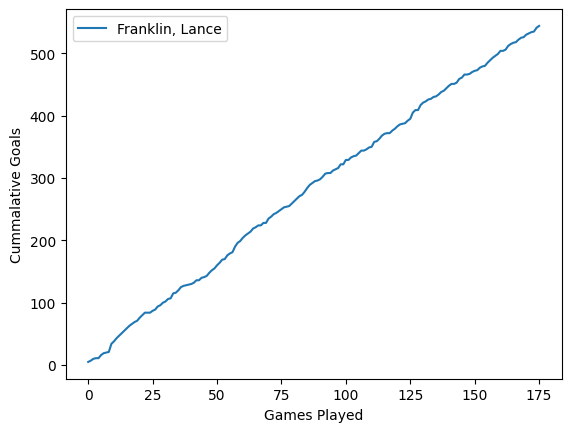

In [118]:
# Code for Task 2
# mask data  based on displayName
playerName='Franklin, Lance' 
playerStats=merge_GamePlayerStats.loc[merge_GamePlayerStats["displayName"]==playerName]

# sort and then re-index on game number to get graph to populate from zero
# assumption is gamenumber is unique
playerStats=playerStats.sort_values(by='gameNumber') 
#playerStats=playerStats.set_index("gameNumber")
#display (playerStats[["gameId","date","year","round","gameNumber","playerId", "displayName","Goals","venue"]])

cumulative=playerStats["Goals"].cumsum()
cumulative=cumulative.reset_index(drop=True)
#display (cumulative)
canvas = cumulative.plot(kind="line", ylabel="Cummalative Goals", xlabel="Games Played", legend=True, label=playerName)


Analysis of the plot produced in Task 2

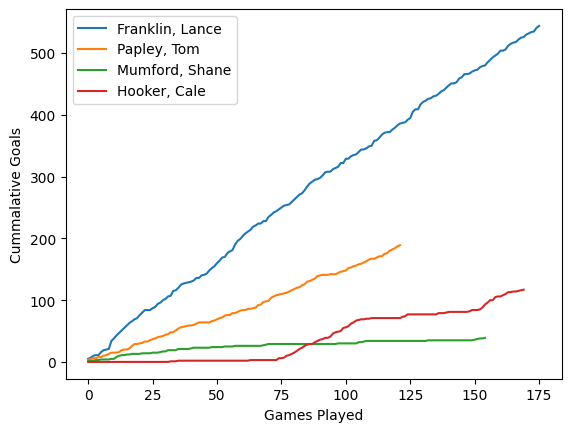

In [127]:
# Code for Task 3

# mask data  based on playerId 
players=["Franklin, Lance","Papley, Tom","Mumford, Shane","Hooker, Cale"]


for playerName in players:

    playerStats=merge_GamePlayerStats.loc[merge_GamePlayerStats["displayName"]==playerName]
    playerStats=playerStats.sort_values(by='gameNumber') 
    #playerStats=playerStats.set_index("gameNumber")
    #playerStats=playerStats.reset_index()
    
    #display (playerStats[["gameId","date","year","round","gameNumber","playerId", "displayName","Goals","venue"]])
    
    cumulativeGoals=playerStats["Goals"].cumsum()
    cumulativeGoals=cumulativeGoals.reset_index(drop=True)
    #display(cumulativeGoals) 
    canvas = cumulativeGoals.plot(kind='line', ylabel="Cummalative Goals", xlabel="Games Played", legend=True, label=playerName)
    

    

Analysis of the plot produced in Task 3

,gameId,date,year,round,gameNumber,playerId,displayName,Goals,venue
0,2012R103,30-Mar-2012,2012,R1,143,2005708162,"Franklin, Lance",5,M.C.G.
1,2012R209,09-Apr-2012,2012,R2,144,2005708162,"Franklin, Lance",2,M.C.G.
2,2012R308,15-Apr-2012,2012,R3,145,2005708162,"Franklin, Lance",3,M.C.G.
3,2012R405,21-Apr-2012,2012,R4,146,2005708162,"Franklin, Lance",1,Subiaco
4,2012R507,29-Apr-2012,2012,R5,147,2005708162,"Franklin, Lance",0,York Park
...,...,...,...,...,...,...,...,...,...
171,2021R1907,25-Jul-2021,2021,R19,314,2005708162,"Franklin, Lance",2,Carrara
172,2021R2007,01-Aug-2021,2021,R20,315,2005708162,"Franklin, Lance",2,M.C.G.
173,2021R2105,07-Aug-2021,2021,R21,316,2005708162,"Franklin, Lance",1,Docklands
174,2021R2303,21-Aug-2021,2021,R23,317,2005708162,"Franklin, Lance",6,Docklands


0        5
1        7
2       10
3       11
4       11
      ... 
171    532
172    534
173    535
174    541
175    544
Name: Goals, Length: 176, dtype: int64

0      143
1      144
2      145
3      146
4      147
      ... 
171    314
172    315
173    316
174    317
175    318
Name: gameNumber, Length: 176, dtype: int64

,gameId,date,year,round,gameNumber,playerId,displayName,Goals,venue
0,2012R107,31-Mar-2012,2012,R1,50,2008723099,"Hooker, Cale",0,Docklands
1,2012R402,21-Apr-2012,2012,R4,51,2008723099,"Hooker, Cale",0,M.C.G.
2,2012R501,25-Apr-2012,2012,R5,52,2008723099,"Hooker, Cale",0,M.C.G.
3,2012R602,05-May-2012,2012,R6,53,2008723099,"Hooker, Cale",0,Docklands
4,2012R706,12-May-2012,2012,R7,54,2008723099,"Hooker, Cale",0,Docklands
...,...,...,...,...,...,...,...,...,...
165,2021R1506,26-Jun-2021,2021,R15,215,2008723099,"Hooker, Cale",1,M.C.G.
166,2021R1602,02-Jul-2021,2021,R16,216,2008723099,"Hooker, Cale",0,Kardinia Park
167,2021R1702,09-Jul-2021,2021,R17,217,2008723099,"Hooker, Cale",1,Docklands
168,2021R1806,18-Jul-2021,2021,R18,218,2008723099,"Hooker, Cale",1,Carrara


0        0
1        0
2        0
3        0
4        0
      ... 
165    114
166    114
167    115
168    116
169    117
Name: Goals, Length: 170, dtype: int64

0       50
1       51
2       52
3       53
4       54
      ... 
165    215
166    216
167    217
168    218
169    219
Name: gameNumber, Length: 170, dtype: int64

'\n    coefficients = np.polyfit(gameNumber, cumulativeGoals, 1)\n    # - Creating the function / formula, that we can use -\n    f = np.poly1d(coefficients)  \n \n    # - Using our function / formula to generate predictions -\n    cumulativeGoals["prediction"] = f(playerStats["gameNumber"])\n\n    #display (playerStats["prediction"])\n    # - Plotting everything -\n    #canvas = playerStats.set_index(\'gameNumber\')[\'cumulative\'].plot(kind=\'line\', legend=True)\n    canvas = playerStats.set_index(\'gameNumber\')[\'cumulative\'].plot(kind=\'line\', legend=True)\n\n    #canvas = playerStats.plot(kind="line", x="gameNumber", y="cumulative")\n    #playerStats.plot(kind=\'line\', x=176, y=\'prediction\', color=\'pink\', ax=canvas) \n    # - Plotting everything -\n    #canvas = playerStats.set_index(\'gameNumber\')[\'cumulativeGoals\'].plot(kind=\'line\', legend=True)\n'

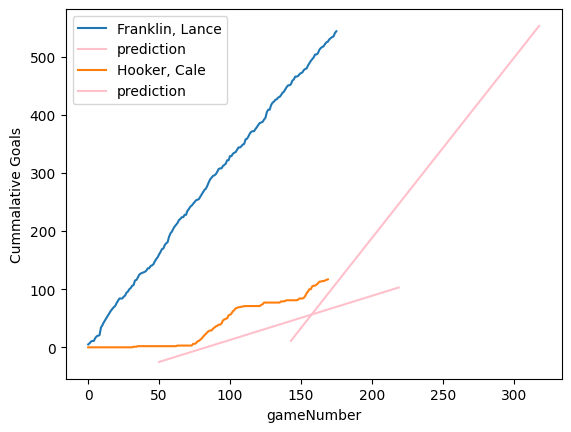

In [143]:
# Code for Task 4
# mask data  based on playerName


players=["Franklin, Lance","Hooker, Cale"]


for playerName in players:

    playerStats=merge_GamePlayerStats.loc[merge_GamePlayerStats["displayName"]==playerName]
    
    playerStats=playerStats.sort_values(by='gameNumber') 
    playerStats=playerStats.reset_index()
   
    display (playerStats[["gameId","date","year","round","gameNumber","playerId", "displayName","Goals","venue"]])
    cumulativeGoals=playerStats["Goals"].cumsum()
    cumulativeGoals=cumulativeGoals.reset_index(drop=True)

    display (cumulativeGoals)
    
    display (playerStats['gameNumber'])
    coefficients = np.polyfit(playerStats['gameNumber'], cumulativeGoals, 1)
    # - Creating the function / formula, that we can use -
    f = np.poly1d(coefficients)  
 
    # - Using our function / formula to generate predictions -
    playerStats["prediction"] = f(playerStats['gameNumber'])
    #canvas = playerStats.plot(kind="line", x="gameNumber", y="cumulative")
    
    canvas = cumulativeGoals.plot(kind='line', ylabel="Cummalative Goals", xlabel="Games Played", legend=True, label=playerName)
    playerStats.plot(kind='line', x='gameNumber', y='prediction', color='pink', ax=canvas) 

#cumulativeGoals=cumulativeGoals.reset_index(drop=True)
#display (cumulativeGoals)
    
#canvas = playerStats.plot(kind="line", x="gameNumber", y="Goals")

#canvas = playerStats.set_index('gameNumber')[Goals].plot(kind='line', legend=True)
'''
    coefficients = np.polyfit(gameNumber, cumulativeGoals, 1)
    # - Creating the function / formula, that we can use -
    f = np.poly1d(coefficients)  
 
    # - Using our function / formula to generate predictions -
    cumulativeGoals["prediction"] = f(playerStats["gameNumber"])

    #display (playerStats["prediction"])
    # - Plotting everything -
    #canvas = playerStats.set_index('gameNumber')['cumulative'].plot(kind='line', legend=True)
    canvas = playerStats.set_index('gameNumber')['cumulative'].plot(kind='line', legend=True)

    #canvas = playerStats.plot(kind="line", x="gameNumber", y="cumulative")
    #playerStats.plot(kind='line', x=176, y='prediction', color='pink', ax=canvas) 
    # - Plotting everything -
    #canvas = playerStats.set_index('gameNumber')['cumulativeGoals'].plot(kind='line', legend=True)
'''
#canvas = playerStats.plot(kind="line", x="gameNumber", y="cumulative")
#plt=playerStats.plot(kind='line', x='gameNumber', y='Goals', color='pink', ax=canvas) 

Analysis of the plot produced in Task 4